# Обучим модели для фиксированного n

Загрузим датасет

In [280]:
import pandas as pd

df = pd.read_csv('../data/distance_graph_dataset.csv')

In [281]:
df.sample(10)

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
6658,400,1,183,183,12,393,13
6251,200,0,64,64,9,200,12
3048,200,1,100,89,8,194,9
5611,25,1,12,9,4,19,5
743,400,0,143,126,13,389,15
5404,450,0,146,145,11,428,13
3903,200,0,71,71,10,194,12
4490,400,0,134,134,12,396,14
5229,400,0,140,139,13,392,15
3954,25,1,14,10,3,23,4


Отберем только данные, где `n = 25`

In [282]:
df = df[df['n'] == 25]

In [283]:
df.describe()

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
count,928.0,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,25.0,0.488147,11.120690,9.769397,5.328664,20.807112,5.993534
std,0.0,0.500129,2.535717,2.345243,1.300882,3.551512,1.285535
min,25.0,0.000000,6.000000,5.000000,2.000000,1.000000,2.000000
25%,25.0,0.000000,9.000000,8.000000,4.000000,20.000000,5.000000
50%,25.0,0.000000,11.000000,9.000000,5.000000,22.000000,6.000000
75%,25.0,1.000000,13.000000,11.000000,6.000000,23.000000,7.000000
max,25.0,1.000000,20.000000,19.000000,11.000000,25.000000,11.000000


In [284]:
df = df.drop('n', axis=1)

In [285]:
df.sample(10)

,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
9714,0,8,8,5,20,7
9375,1,14,11,5,23,5
6575,1,13,13,4,24,4
2738,0,12,7,7,23,7
7407,0,10,9,6,25,7
6344,0,8,7,8,21,9
1267,0,9,7,7,19,7
6429,1,12,12,6,24,7
3091,0,10,8,6,24,7
1898,1,9,9,5,25,6


Посмотрим на распределение признаков:

In [286]:
counts = df['distribution'].value_counts()
props = df['distribution'].value_counts(normalize=True)
print(counts, props)

distribution
0    475
1    453
Name: count, dtype: int64 distribution
0    0.511853
1    0.488147
Name: proportion, dtype: float64


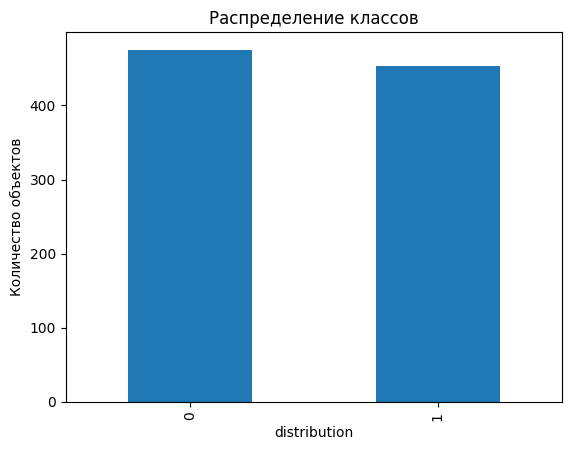

In [287]:
import matplotlib.pyplot as plt

counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('distribution')
plt.ylabel('Количество объектов')
plt.show()

Распределение примерно одинаковое

In [288]:
RANDOM_STATE = 42
N = 25
target = 'distribution'

**Функции для вычисления мощности и ошибки первого рода**

In [289]:
from sklearn.metrics import confusion_matrix

def power_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    power = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return power

def type1_err_score(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    type1_error = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    return type1_error

## Обучим логистическую регрессию

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [291]:
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [292]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE))
])

In [293]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [294]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)
power     = power_score(y_test, y_pred)
type1_err = type1_err_score(y_test, y_pred)

In [295]:
print(f'Accuracy:    {accuracy:.4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1-score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')
print(f'Power:       {power:.4f}')
print(f'Type 1 Error {type1_err:.4f}')

Accuracy:    0.8548
Precision:   0.8857
Recall:      0.8611
F1-score:    0.8732
ROC AUC:     0.9322
Power:       0.8611
Type 1 Error 0.1538


Попробуем добавить новые признаки

In [296]:
import pandas as pd
import numpy as np

df_new = pd.read_csv('../data/distance_graph_dataset.csv')

df_new = df_new[df_new['n'] == 25]

df_new['chromatic_to_clique_ratio']           = df_new['chromatic_number'] / df_new['clique_number']
df_new['chromatic_to_max_independent_ratio']  = df_new['chromatic_number'] / df_new['max_independent_set_size']
df_new['clique_to_max_independent_ratio']     = df_new['clique_number']    / df_new['max_independent_set_size']
df_new['domination_to_clique_ratio']          = df_new['domination_number'] / df_new['clique_number']
df_new['min_clique_cover_to_chromatic_ratio'] = df_new['min_clique_cover_size'] / df_new['chromatic_number']

df_new['chromatic_minus_clique']              = df_new['chromatic_number'] - df_new['clique_number']
df_new['min_clique_cover_minus_chromatic']    = df_new['min_clique_cover_size'] - df_new['chromatic_number']
df_new['max_independent_plus_clique']         = df_new['max_independent_set_size'] + df_new['clique_number']

df_new['chromatic_number_sq']                 = df_new['chromatic_number'] ** 2
df_new['clique_number_sq']                    = df_new['clique_number'] ** 2
df_new['max_independent_set_size_sq']         = df_new['max_independent_set_size'] ** 2
df_new['chromatic_clique_product']            = df_new['chromatic_number'] * df_new['clique_number']

df_new['chromatic_number_log']                = np.log1p(df_new['chromatic_number'])
df_new['clique_number_sqrt']                  = np.sqrt(df_new['clique_number'])

Добавим ElasticNet для подбора параметров:

In [297]:
from sklearn.model_selection import GridSearchCV

In [328]:
from sklearn.model_selection import train_test_split

X = df_new.drop(target, axis=1)
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [329]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        max_iter=5000,
        random_state=RANDOM_STATE
    ))
])

param_grid = {
    'classifier__C':      [1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    'classifier__l1_ratio': [0.2, 0.5, 0.7, 0.9]
}

In [330]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=5000,
                                                           penalty='elasticnet',
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'classifier__l1_ratio': [0.2, 0.5, 0.7, 0.9]},
             scoring='recall', verbose=1)

In [331]:
best_C  = grid.best_params_['classifier__C']
best_l1 = grid.best_params_['classifier__l1_ratio']
print("Лучшие параметры:", grid.best_params_)
print("Лучший (CV):", grid.best_score_)

Лучшие параметры: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.2}
Лучший (CV): 0.7768115942028986


In [332]:
best_model = grid.best_estimator_
y_pred  = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [333]:
print(f'Accuracy:    {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:   {precision_score(y_test, y_pred):.4f}')
print(f'Recall:      {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:    {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:     {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:       {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error {type1_err_score(y_test, y_pred):.4f}')

Accuracy:    0.8495
Precision:   0.8846
Recall:      0.8519
F1-score:    0.8679
ROC AUC:     0.9328
Power:       0.8519
Type 1 Error 0.1538


**Вывод:**\
Новые признаки только ухудшили результат, подбор гиперпараметров не дал никакого прироста качества.\
Наилучшие результаты:
* мощность: `0.86`
* ошибка первого рода: `0.15`

## Обучим SVM с kernel='linear'

In [304]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [305]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [306]:
pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', probability=True, random_state=RANDOM_STATE)
)

In [307]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [308]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [309]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      0.8602
Precision:     0.8942
Recall:        0.8611
F1-score:      0.8774
ROC AUC:       0.9310
Power:         0.8611
Type 1 Error:  0.1410


**Вывод:**\
Мощность улучшить не удалось, но немного уменьшилась ошибка первого рода.\
Наилучшие результаты:
* мощность: `0.86`
* ошибка первого рода: `0.14`

**Запустим RandomizedSearchCV**

In [310]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [311]:
pipeline = make_pipeline(
    StandardScaler(),
    SVC(probability=True, random_state=RANDOM_STATE)
)

In [312]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [325]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'svc__C':      loguniform(1e-3, 1e3),
    'svc__kernel': ['linear','rbf'],
    'svc__gamma':  loguniform(1e-4, 1e1)
}

rnd = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=2
)

rnd.fit(X_train, y_train)

print("Best params:", rnd.best_params_)
print("Best CV:",   rnd.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.1s
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.1s
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.1s
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.1s
[CV] END svc__C=0.1767016940294795, svc__gamma=5.669849511478847, svc__kernel=linear; total time=   0.1s
[CV] END svc__C=47.6591180868084, svc__gamma=0.09643857615941427, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=47.6591180868084, svc__gamma=0.09643857615941427, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=47.6591180868084, svc__gamma=0.09643857615941427, svc__kernel=rbf; total time=   0.2s
[CV] END svc__C=47.6591180868084, svc__gamma=0.09643857615941427, svc__kernel=rbf; total time=   0.2s
[CV] 

In [326]:
best = rnd.best_estimator_

y_pred = best.predict(X_test)
y_proba = best.predict_proba(X_test)[:, 1]

In [327]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      0.8602
Precision:     0.8942
Recall:        0.8611
F1-score:      0.8774
ROC AUC:       0.9316
Power:         0.8611
Type 1 Error:  0.1410


**Вывод:**\
Подбор гиперпараметров особо не помог, метрики остались те же:
* мощность: `0.86`
* ошибка первого рода: `0.14`

## RandomForest

In [334]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [335]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [336]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE))
])

In [337]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [338]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [339]:
print(f'Accuracy:      {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision:     {precision_score(y_test, y_pred):.4f}')
print(f'Recall:        {recall_score(y_test, y_pred):.4f}')
print(f'F1-score:      {f1_score(y_test, y_pred):.4f}')
print(f'ROC AUC:       {roc_auc_score(y_test, y_proba):.4f}')
print(f'Power:         {power_score(y_test, y_pred):.4f}')
print(f'Type 1 Error:  {type1_err_score(y_test, y_pred):.4f}')

Accuracy:      0.8065
Precision:     0.8673
Recall:        0.7870
F1-score:      0.8252
ROC AUC:       0.8968
Power:         0.7870
Type 1 Error:  0.1667


**Вывод:**\
`RandomForest` показал наихудшие метрики качества, видимо, для данной задачи подходят наиболее простые и примитивные модели, например логистическая регрессия.

## Результаты
Наилучшие результаты для `n = 25` показала логистическая регрессия:
* мощность: `0.86`
* ошибка первого рода: `0.14`